# Anya's Gojo Revival: Pilot (The Regression Task)

##LIBRARIES AND DEPENDENCIES

Let's first try to import the basic python libraries required to analyse and understand data as in what it says. These include numpy and pandas for manipulation and access of data while seaborn and matplotlib for data visualisation

We Have Used

1. **Pandas**: For data loading, manipulation, analysis.
2. **Numpy**: To Provides Support for large, multi-dimensional arrays and matrices. Also ML Models take arrays as inputs
3. **Matplotlib.pyplot**: Used for basic data visualization.
4. **seaborn**: Built on top of matplotlib, seaborn is used for heatmap generation
5. **StandardScaler from sklearn.preprocessing**: Used for standardizing the dataset, a preprocessing step in machine learning that we have used just for data visualisation.
6. **train_test_split from sklearn.model_selection**: Used for splitting the dataset into training and testing sets for our own train set based model evaluation.
7.** RandomForestRegressor from sklearn.ensemble**: The machine learning model used for regression task here.
8. **mean_squared_error from sklearn.metrics**: Used to calculate the mean squared error between actual and predicted values.


In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

## DATA LOADING

Loading the data into the dataframe df

In [ ]:
#Loading training dataset
df=pd.read_csv("sheet1.csv")

## EXPLORATORY DATA ANALYSIS

The first thing that can be inferred using the dataset is that the amount of training data available is really low and that does increase the trickiness of the problem because from the experience we have so far we have always known data as the oil that efficiently runs the engine ie. the machine learning model

In [ ]:
#Viewing the contents of the dataset
df

,id,a,b,c,d,e,f,g,h,i,...,n,o,p,q,r,s,t,u,v,target
0,1,15-01-2021,1.5570,27337.8060,17558,4.88,424741,424745.88,101,105,...,443,940,30.63,0.0,0.0,356,27337,1530.0084,00:03:21,5.785
1,2,24-07-2019,1.2616,1553.0296,1231,5.64,21688,21693.64,1,4,...,14,31,27.86,0.0,0.0,8,1553,60.2926,00:02:19,0.826
2,3,09-08-2020,1.8000,4563.0000,2535,6.15,57690,57696.15,27,30,...,162,232,25.98,0.0,0.0,103,4563,230.7383,00:03:02,1.201
3,4,12-06-2019,1.2996,2117.0484,1629,5.76,27800,27805.76,9,3,...,34,64,26.28,0.0,0.0,19,2117,100.3671,00:02:50,0.963
4,5,02-06-2021,2.4762,231408.3186,93453,4.26,4175116,4175120.26,464,417,...,2325,9126,33.26,0.0,0.0,1997,231404,17511.5046,00:04:32,59.635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,65,30-06-2021,2.3033,245207.0147,106459,4.16,4449518,4449522.16,825,423,...,2978,11819,38.56,0.0,0.0,2269,245204,21847.0122,00:05:20,125.014
65,66,20-08-2021,1.8174,584179.6038,321437,5.73,7148710,7148715.73,11582,1405,...,4959,58446,45.70,1.0,2.0,3785,584188,64133.8247,00:06:35,317.818
66,67,24-09-2021,2.1319,652107.7039,305881,6.08,7768271,7768277.08,4741,1055,...,4804,56677,47.81,1.0,0.0,3284,652105,54463.2654,00:05:00,397.066
67,68,28-12-2020,1.6154,23749.6108,14702,4.83,373796,373800.83,110,74,...,487,1106,30.22,0.0,0.0,423,23750,1414.7931,00:03:34,6.017


We Must First Check For Null Values
So using the pandas functionalities we can figure out which columns have null value data

In [ ]:
#First we check for any null values
df.isnull().sum()

id        0
a         0
b         0
c         0
d         0
e         0
f         0
g         0
h         0
i         0
j         0
k         0
l         0
m         0
n         0
o         0
p         0
q         8
r         8
s         0
t         0
u         0
v         0
target    0
dtype: int64

Before moving further we must also see if we could observe the datatypes of the features because for regression we must have all values numerical

In [ ]:
datatypes = df.dtypes
datatypes

id          int64
a          object
b         float64
c         float64
d           int64
e         float64
f           int64
g         float64
h           int64
i           int64
j         float64
k         float64
l           int64
m           int64
n           int64
o           int64
p         float64
q         float64
r         float64
s           int64
t           int64
u         float64
v          object
target    float64
dtype: object

Now, as per this result, two features: a and v have object datatypes which means that they need to be handled

## Data Preprocessing And Visualisation

Although, a is about specific dates and to be honest, we don't expect dates to have a great correlation to the target that is revenue on a particular date. However we can also realise that on certain seasons of the year the channel might be in more demand and less on some days, for example cricket analysis channels are in much more demand when there is IPL or World Cup match, anime channels are more active and get higher viewership whenever an anime goes firing across the world. Similarly we also realise that as time increases more number of people have access to internet and so does the revenue increase but since dates are mostly between 2019-2021 that isn't much big a change

First we need to handle v, which is a bigger problem because v means average viewer duration and views have a direct relation to the revenue and a must be decided later

In [ ]:
for i in range(69):
  minute = float(df.v[i][4])
  df.loc[i,'v'] = minute

To visualise the data we must first try to visualise this, now in this dataset some of the data points are in single digit while some are in 5 digits which makes us use standard scaler for the purpose

Use of standard scaler was realised using this gfg article: https://www.geeksforgeeks.org/data-pre-processing-wit-sklearn-using-standard-and-minmax-scaler/

And a little bit of research, ultimately we realised that on small datasets generally the standard scaler works good

In [ ]:
#scaling data
scaled_features=df.copy()
col_names = ['c','d','f','g','h','i','l','m','n','o','s','t','v','u']
features=scaled_features[col_names]
scaler=StandardScaler().fit(features.values)
features=scaler.transform(features.values)
scaled_features[col_names] = features
scaled_features

,id,a,b,c,d,e,f,g,h,i,...,n,o,p,q,r,s,t,u,v,target
0,1,15-01-2021,1.5570,-0.278080,-0.204403,4.88,-0.296342,-0.296343,-0.176765,-0.075846,...,-0.210029,-0.269755,30.63,0.0,0.0,-0.197354,-0.278085,-0.307902,0.320935,5.785
1,2,24-07-2019,1.2616,-0.482476,-0.475224,5.64,-0.511893,-0.511894,-0.244129,-0.488472,...,-0.575782,-0.360372,27.86,0.0,0.0,-0.600112,-0.482475,-0.436069,-0.564846,0.826
2,3,09-08-2020,1.8000,-0.458616,-0.453594,6.15,-0.492640,-0.492640,-0.226614,-0.382252,...,-0.449602,-0.340335,25.98,0.0,0.0,-0.490164,-0.458615,-0.421205,0.320935,1.201
3,4,12-06-2019,1.2996,-0.478005,-0.468622,5.76,-0.508625,-0.508625,-0.238740,-0.492558,...,-0.558731,-0.357082,26.28,0.0,0.0,-0.587382,-0.478004,-0.432574,-0.564846,0.963
4,5,02-06-2021,2.4762,1.339590,1.054490,4.26,1.709346,1.709345,0.067764,1.198800,...,1.394510,0.546293,33.26,0.0,0.0,1.701862,1.339555,1.085767,1.206716,59.635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,65,30-06-2021,2.3033,1.448973,1.270224,4.16,1.856095,1.856095,0.310945,1.223312,...,1.951239,0.814754,38.56,0.0,0.0,2.016661,1.448948,1.463845,2.092497,125.014
65,66,20-08-2021,1.8174,4.136013,4.836127,5.73,3.299614,3.299615,7.557218,5.235179,...,3.640182,5.462922,45.70,1.0,2.0,3.771208,4.136075,5.151474,2.978278,317.818
66,67,24-09-2021,2.1319,4.674480,4.578095,6.08,3.630953,3.630954,2.948893,3.805288,...,3.508034,5.286573,47.81,1.0,0.0,3.191374,4.674454,4.308151,2.092497,397.066
67,68,28-12-2020,1.6154,-0.306523,-0.251776,4.83,-0.323587,-0.323588,-0.170703,-0.202494,...,-0.172516,-0.253207,30.22,0.0,0.0,-0.119811,-0.306519,-0.317950,0.320935,6.017


A good method to check for relation between features and target would be visualising the correlations matrix which can be used to understand the relations and thus eliminate the features that aren't much related to the target i.e revenue

<ipython-input-18-9c8a19fd06f8>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(scaled_features.corr(),cmap="YlGnBu",annot=True)


<Axes: >

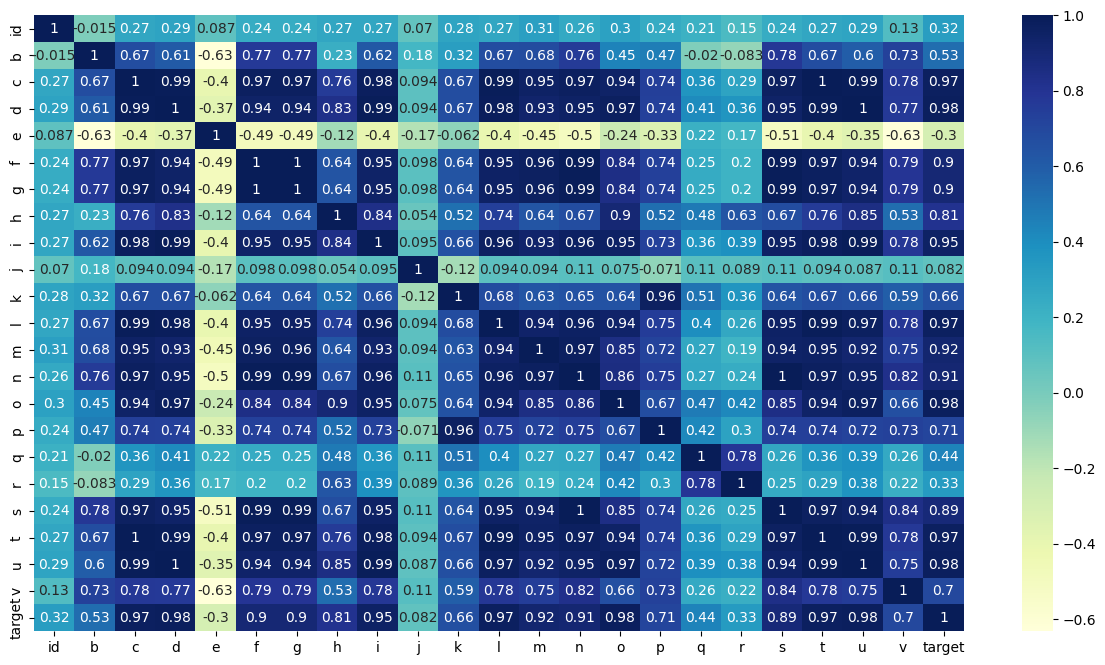

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(scaled_features.corr(),cmap="YlGnBu",annot=True)

Looking at the heatmap we can realise that features namely e, j and r are quite less correlated to the target and thus we can eliminate them. Id and target will also get eliminated because id is random data and target must be extracted to the y_train dataset.

In [ ]:
y=df['target']
x=df.drop(['id','a','target','j','r','e'],axis=1)
x

,b,c,d,f,g,h,i,k,l,m,n,o,p,q,s,t,u,v
0,1.5570,27337.8060,17558,424741,424745.88,101,105,35.51,20,87,443,940,30.63,0.0,356,27337,1530.0084,3.0
1,1.2616,1553.0296,1231,21688,21693.64,1,4,33.50,1,6,14,31,27.86,0.0,8,1553,60.2926,2.0
2,1.8000,4563.0000,2535,57690,57696.15,27,30,32.13,11,59,162,232,25.98,0.0,103,4563,230.7383,3.0
3,1.2996,2117.0484,1629,27800,27805.76,9,3,32.04,0,15,34,64,26.28,0.0,19,2117,100.3671,2.0
4,2.4762,231408.3186,93453,4175116,4175120.26,464,417,37.52,157,328,2325,9126,33.26,0.0,1997,231404,17511.5046,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,2.3033,245207.0147,106459,4449518,4449522.16,825,423,42.72,171,709,2978,11819,38.56,0.0,2269,245204,21847.0122,5.0
65,1.8174,584179.6038,321437,7148710,7148715.73,11582,1405,51.43,404,1174,4959,58446,45.70,1.0,3785,584188,64133.8247,6.0
66,2.1319,652107.7039,305881,7768271,7768277.08,4741,1055,53.89,521,1520,4804,56677,47.81,1.0,3284,652105,54463.2654,5.0
67,1.6154,23749.6108,14702,373796,373800.83,110,74,35.05,35,64,487,1106,30.22,0.0,423,23750,1414.7931,3.0


Now, we must account for the null values in the q (videos published) feature. We observe that the videos published by a person/channel in particular day is usually a small number between 1-10 and the same trend is reflected in the dataset. Thus, we decided to use mean

In [ ]:
for i in df.groupby('q'):
  print(i)


(0.0,     id           a       b            c       d     e        f           g  \
0    1  15-01-2021  1.5570   27337.8060   17558  4.88   424741   424745.88   
1    2  24-07-2019  1.2616    1553.0296    1231  5.64    21688    21693.64   
2    3  09-08-2020  1.8000    4563.0000    2535  6.15    57690    57696.15   
3    4  12-06-2019  1.2996    2117.0484    1629  5.76    27800    27805.76   
4    5  02-06-2021  2.4762  231408.3186   93453  4.26  4175116  4175120.26   
5    6  19-11-2019  1.4029     577.9948     412  6.29     7708     7714.29   
6    7  13-11-2020  1.4804   13058.6084    8821  4.60   222891   222895.60   
8    9  12-05-2021  2.3385  172515.8220   73772  4.82  2830920  2830924.82   
9   10  10-03-2019  1.4958    4482.9126    2997  8.47    41239    41247.47   
11  12  19-08-2020  1.7870    4957.1380    2774  6.04    62944    62950.04   
12  13  26-09-2019  1.4332    2435.0068    1699  5.86    31100    31105.86   
13  14  23-07-2020  1.8361    4997.8642    2722  5.98    6

Filling the missing values with mean

In [ ]:
x['q'] = x['q'].fillna(x['q'].mean())
x.isnull().sum()


b    0
c    0
d    0
f    0
g    0
h    0
i    0
k    0
l    0
m    0
n    0
o    0
p    0
q    0
s    0
t    0
u    0
v    0
dtype: int64

## MODEL TRAINING

Splitting the DATA into train and test set

In [ ]:
#LETS SPLIT OUR MODEL
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

## MODEL EVALUATION

Training the model
So, basically we tried using a number of models and checking the rmse score for the evaluation of the best model type. We started with basic Linear Regression but it gave a values in negative numbers which is highly unrecommended considering its revenue prediction. Then we tried some other deep learning models like Gradient Boosting Regressor, XGBoostRegressor and then finally the RandomForestRegressor which gave us the best RMSE score

In [ ]:
#LETS TRAIN OUR MODEL

forest=RandomForestRegressor(random_state=0)
forest.fit(X_train,y_train)
pred = forest.predict(X_test)
forest.score(X_test,y_test)

0.9795581534796329

Now evaluating our models

In [ ]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test,pred))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 11.625033930929334


## PREDICTION

Now that we see that this model is giving us a good result, we can now try this model and get predictions for the real test dataset, so let's start by importing the data and performing basic preprocessing as done with the train dataset

In [ ]:
test_df=pd.read_csv("sheet2.csv")
test_df.isnull().sum()


id      0
a       0
b       0
c       0
d       0
e       0
f       0
g       0
h       0
i       0
j      37
k       0
l       0
m       0
n       0
o       0
p       0
q     134
r     134
s       0
t       0
u       0
v       0
dtype: int64

In [ ]:
test_df=test_df.drop(['id','a','j','r','e'],axis=1)
for i in range(1064):
  minute = float(test_df.v[i][4])
  test_df.loc[i,'v'] = minute

In [ ]:
test_df.isnull().sum()

b      0
c      0
d      0
f      0
g      0
h      0
i      0
k      0
l      0
m      0
n      0
o      0
p      0
q    134
s      0
t      0
u      0
v      0
dtype: int64

In [ ]:
test_df['q'] = test_df['q'].fillna(test_df['q'].mean())

In [ ]:
test_df.isnull().sum()

b    0
c    0
d    0
f    0
g    0
h    0
i    0
k    0
l    0
m    0
n    0
o    0
p    0
q    0
s    0
t    0
u    0
v    0
dtype: int64

Making Predictions Based On The Test Dataset and converting the prediction dataset into a dataframe

In [ ]:
predictions_test= forest.predict(test_df)
predictions_test=pd.DataFrame(predictions_test)
predictions_test

,0
0,2.58088
1,7.44244
2,0.32374
3,0.27255
4,5.08386
...,...
1059,0.18555
1060,11.49374
1061,7.87500
1062,1.31482


Converting the dataframe into the Result.csv
And that's it, the predictions are ready to be evaluated on the kaggle website!

In [ ]:
i = 1
l = []
while i<=1064:
  l.append(i)
  i+=1
predictions_test.insert(0, "id", l, True)
predictions_test.columns = ['id', 'target']
predictions_test.to_csv('Result.csv')